In [1]:
import mshr
from dolfin import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
domain = mshr.Circle(Point(1.5,0), 1)

In [3]:
mesh = mshr.generate_mesh(domain, 20)

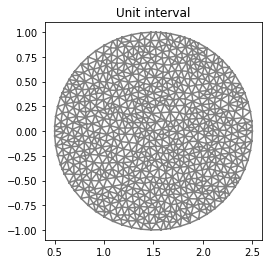

In [4]:
plot(mesh, title="Unit interval")

In [5]:
V = FunctionSpace(mesh, "Lagrange", 2)

In [6]:
def boundary(x, on_boundary):
    return on_boundary

In [7]:
bc = DirichletBC(V, Constant(0.0), boundary)

In [8]:
u0 = Constant(0.0)
weight = Constant(5.0)

In [9]:
u = TrialFunction(V)
v = TestFunction(V)
g = Expression("1/x[0]", degree=2)
a = inner(grad(u), grad(v))*dx - g*Dx(u, 0)*v*dx  
L = v*weight*dx  


In [10]:
u = Function(V)
solve(a == L, u, bc)

In [11]:
du11 = project(Dx(u, 0)+ Dx(u, 1) , V)
du10 = project(Dx(u, 0) , V)
du01 = project(Dx(u, 1) , V)

In [12]:
file = File("poisson_u.pvd")
file << u

In [13]:
file = File("poisson_Du11.pvd")
file << du11

In [14]:
file = File("poisson_Du10.pvd")
file << du10

In [15]:
file = File("poisson_Du01.pvd")
file << du01

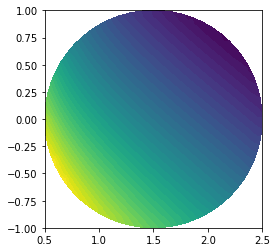

In [16]:
plot(du11)
plt.show()

In [76]:
u_values  = du11.vector().get_local()

In [77]:
type(u_values)

numpy.ndarray

In [78]:
len(u_values)

3159

In [82]:
u_values[100]

2.625043683151198

In [18]:
du11(1,0)

1.0998746868214466